# Modelo de Deep Learning para detectar tumores de cerebro aplicando CLAHE

## Integrantes:
* Edison Naranjo
* Berenice Arguero
* Marcela Mosquera

**Nota:** Al set de datos se le aplicó previamente ecualización de imágenes (CLAHE) para trabajar en el desarrollo de esta Red Neuronal.

## Importación  de las librerías requeridas

In [ ]:
# Instalación de Tensorflow
# =========================

! pip install tensorflow -U

In [ ]:
! pip install pydot

In [ ]:
! pip install pydotplus

In [ ]:
! pip install graphviz

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Carga de Datos

Se cargará los datos desde Google Drive

In [ ]:
# Cargar datos desde Google Drive
# ===============================

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Funciones para obtener los dataframes de entrenamiento y prueba con la ruta de la imagen y la clase a la que pertenece

In [ ]:
# Función llamada test_df que toma un argumento ts_path, el cual es la ruta
# al directorio raíz que contiene las subcarpetas de las diferentes clases
# de imágenes.

def test_df(ts_path):

  # Se inicializan dos listas vacías: classes para almacenar las etiquetas de
  # las clases y class_paths para almacenar las rutas completas de las imágenes.

  classes = []
  class_paths = []

  # Variable para obtener una lista de los nombres de las subcarpetas en el
  # directorio ts_path. Cada subcarpeta se asume que representa una clase diferente.

  files = os.listdir(ts_path)

  # Iteración a través de las Subcarpetas y Archivos

  for file in files:

    # Ruta completa a la subcarpeta.

    label_dir = os.path.join(ts_path, file)

    # Lista de todos los archivos (imágenes) en la subcarpeta.

    label = os.listdir(label_dir)

    # Se itera sobre cada archivo de imagen en label.

    for image in label:

      # Ruta completa a la imagen.

      image_path = os.path.join(label_dir, image)

      # Añade la ruta de la imagen a la lista class_paths.

      class_paths.append(image_path)

      # Añade la etiqueta de la clase (nombre de la subcarpeta) a la lista classes.

      classes.append(file)

  # Se crea una Serie de Pandas con las etiquetas de clase, nombrada 'Class'.

  image_classes = pd.Series(classes, name='Class')

  # Se crea una Serie de Pandas con las rutas de las imágenes, nombrada 'Class Path'.

  image_paths = pd.Series(class_paths, name='Class Path')

  # Combina las dos Series en un DataFrame de Pandas a lo largo del eje de columnas (axis=1).

  ts_df = pd.concat([image_paths, image_classes], axis=1)

  # Se devuelve el DataFrame resultante.

  return ts_df

La explicación es la misma para la función **train_df**

In [ ]:

def train_df(tr_path):
  classes = []
  class_paths = []
  files = os.listdir(tr_path)

  for file in files:
    label_dir = os.path.join(tr_path, file)
    label = os.listdir(label_dir)
    for image in label:
      image_path = os.path.join(label_dir, image)
      class_paths.append(image_path)
      classes.append(file)

  image_classes = pd.Series(classes, name='Class')
  image_paths = pd.Series(class_paths, name='Class Path')
  tr_df = pd.concat([image_paths, image_classes], axis=1)
  return tr_df

In [ ]:
# La variable tr_df se obtiene de la función train_df utilizando la ruta
# /content/drive/MyDrive/Tumor_Brain/Training

tr_df = train_df(tr_path="/content/drive/MyDrive/Tumor_Brain_CLAHE/Training")

In [ ]:
print(f"El dataframe de entranemiento tiene {tr_df.shape[0]} filas y {tr_df.shape[1]} columnas")

El dataframe de entranemiento tiene 5712 filas y 2 columnas


In [ ]:
# Cinco primeras filas del dataframe tr_df

tr_df.head()

,Class Path,Class
0,/content/drive/MyDrive/Tumor_Brain_CLAHE/Train...,meningioma
1,/content/drive/MyDrive/Tumor_Brain_CLAHE/Train...,meningioma
2,/content/drive/MyDrive/Tumor_Brain_CLAHE/Train...,meningioma
3,/content/drive/MyDrive/Tumor_Brain_CLAHE/Train...,meningioma
4,/content/drive/MyDrive/Tumor_Brain_CLAHE/Train...,meningioma


In [ ]:
# La variable ts_df se obtiene de la función train_df utilizando la ruta
# /content/drive/MyDrive/Tumor_Brain/Testing

ts_df = test_df('/content/drive/MyDrive/Tumor_Brain_CLAHE/Testing')

In [ ]:
print(f"El dataframe de entranemiento tiene {ts_df.shape[0]} filas y {ts_df.shape[1]} columnas")

El dataframe de entranemiento tiene 1311 filas y 2 columnas


In [ ]:
ts_df.head()

,Class Path,Class
0,/content/drive/MyDrive/Tumor_Brain_CLAHE/Testi...,notumor
1,/content/drive/MyDrive/Tumor_Brain_CLAHE/Testi...,notumor
2,/content/drive/MyDrive/Tumor_Brain_CLAHE/Testi...,notumor
3,/content/drive/MyDrive/Tumor_Brain_CLAHE/Testi...,notumor
4,/content/drive/MyDrive/Tumor_Brain_CLAHE/Testi...,notumor


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

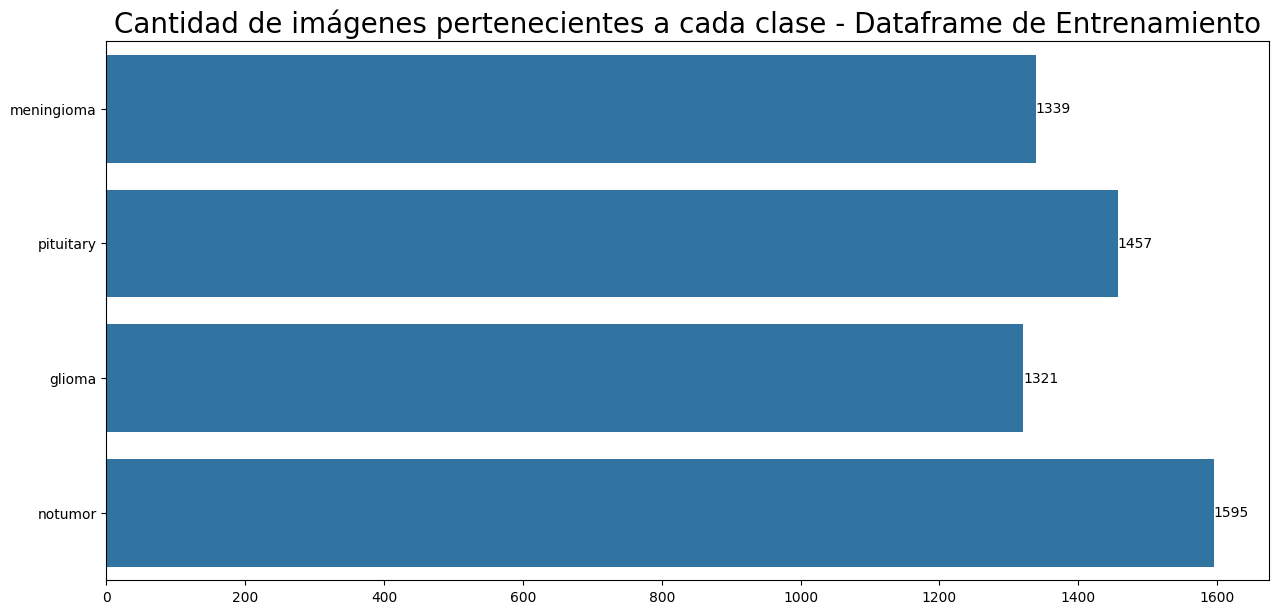

In [ ]:
# Cantidad de imágenes pertenecientes a cada clase - DataFrame de Entrenamiento
# =============================================================================

plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de imágenes pertenecientes a cada clase - Dataframe de Entrenamiento', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

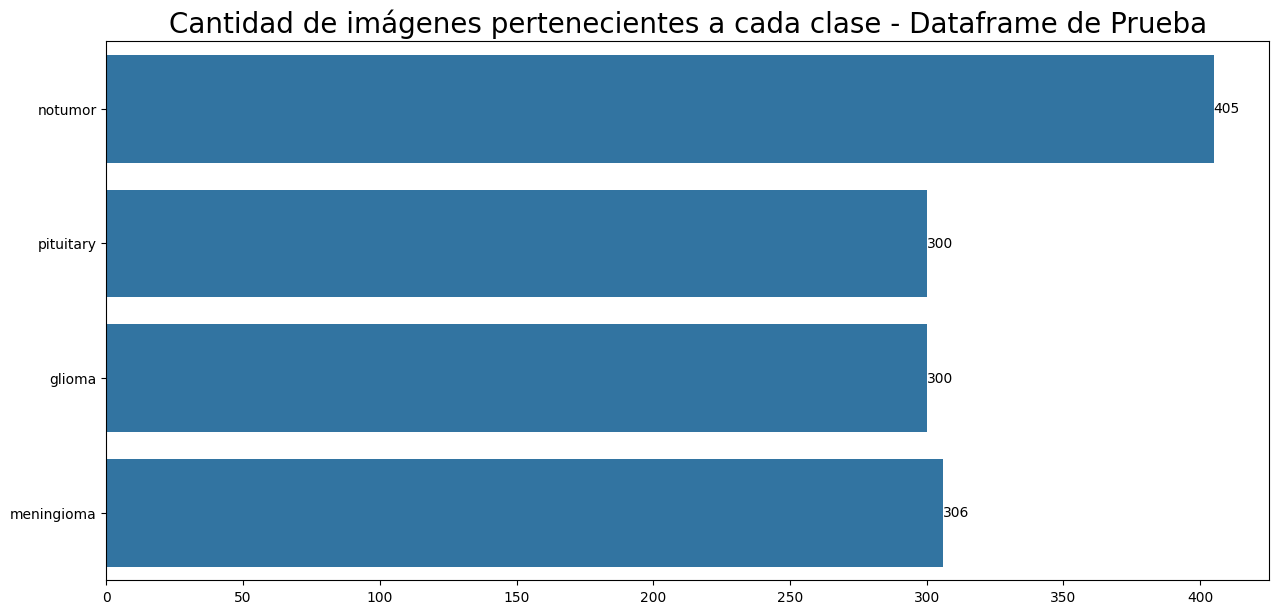

In [ ]:
# Cantidad de imágenes pertenecientes a cada clase - DataFrame de Prueba
# ======================================================================


plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de imágenes pertenecientes a cada clase - Dataframe de Prueba', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

## División de los datos en entrenamiento, prueba y validación

In [ ]:
# El dataset de validación se obtiene diviendo la mitad del dataset de test

valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [ ]:
print(f"El dataframe de validacion tiene {valid_df.shape[0]} filas y {valid_df.shape[1]} columnas")

El dataframe de validacion tiene 655 filas y 2 columnas


## Preprocesamiento de Datos

ImageDataGenerator es una clase utilizada para generar lotes de tensores de imagen con aumentos de datos en tiempo real. Esto es muy útil para el entrenamiento de modelos de redes neuronales, ya que permite ampliar artificialmente el tamaño del dataset aplicando transformaciones aleatorias a las imágenes de entrenamiento.

In [ ]:
batch_size = 16
img_size = (299,299)

* __batch_size:__ define el número de imágenes que se procesarán en cada lote durante el entrenamiento. En este caso, el tamaño del lote es 16.
* __img_size:__ define el tamaño al que se redimensionarán todas las imágenes de entrada. Aquí, las imágenes se redimensionarán a 299x299 píxeles, que es el tamaño predeterminado de la imagen de entrada para este modelo.

In [ ]:
tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

* __ImageDataGenerator(brightness_range=(.8, 1.2)):__ crea un objeto ImageDataGenerator para el conjunto de entrenamiento. Este generador ajustará el brillo de las imágenes en un rango entre 0.8 y 1.2 del brillo original. Esto es una técnica de aumento de datos que ayuda a mejorar la generalización del modelo al exponerlo a diferentes condiciones de iluminación.

In [ ]:
gen = ImageDataGenerator()

* __ImageDataGenerator()__: crea un objeto ImageDataGenerator sin especificar ningún aumento de datos. Este generador se utilizará para los conjuntos de validación y prueba, donde generalmente no se desea aplicar aumentos para evaluar el rendimiento real del modelo.

### Flujo de imágenes de entrenamiento

In [ ]:
tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
y_col='Class',batch_size=batch_size,
target_size=img_size)

Found 5712 validated image filenames belonging to 4 classes.


* __tr_gen.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size):__ crea un flujo de datos de imágenes a partir de un DataFrame tr_df para el entrenamiento.

* __tr_df:__ DataFrame que contiene las rutas a las imágenes (Class Path) y sus etiquetas (Class).
* __x_col:__ nombre de la columna en el DataFrame que contiene las rutas de las imágenes.
* __y_col:__ nombre de la columna en el DataFrame que contiene las etiquetas de las imágenes.
* __batch_size:__ número de imágenes por lote.
* __target_size:__ tamaño al que se redimensionarán las imágenes.

### Flujo de imágenes de validación

In [ ]:
valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
y_col='Class',batch_size=batch_size,
target_size=img_size)

Found 655 validated image filenames belonging to 4 classes.


* __valid_gen.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size):__ similar al anterior, pero para el conjunto de validación valid_df.

### Flujo de imágenes de prueba

In [ ]:
ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
y_col='Class',batch_size=batch_size,
target_size=img_size,shuffle=False)

Found 656 validated image filenames belonging to 4 classes.


* __ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size, shuffle=False):__ crea un flujo de datos de imágenes a partir de un DataFrame ts_df para el conjunto de prueba.
* __shuffle=False:__ asegura que las imágenes no se barajen, lo cual es útil para evaluar el rendimiento del modelo de manera consistente.

## Obtener Muestras de los datos

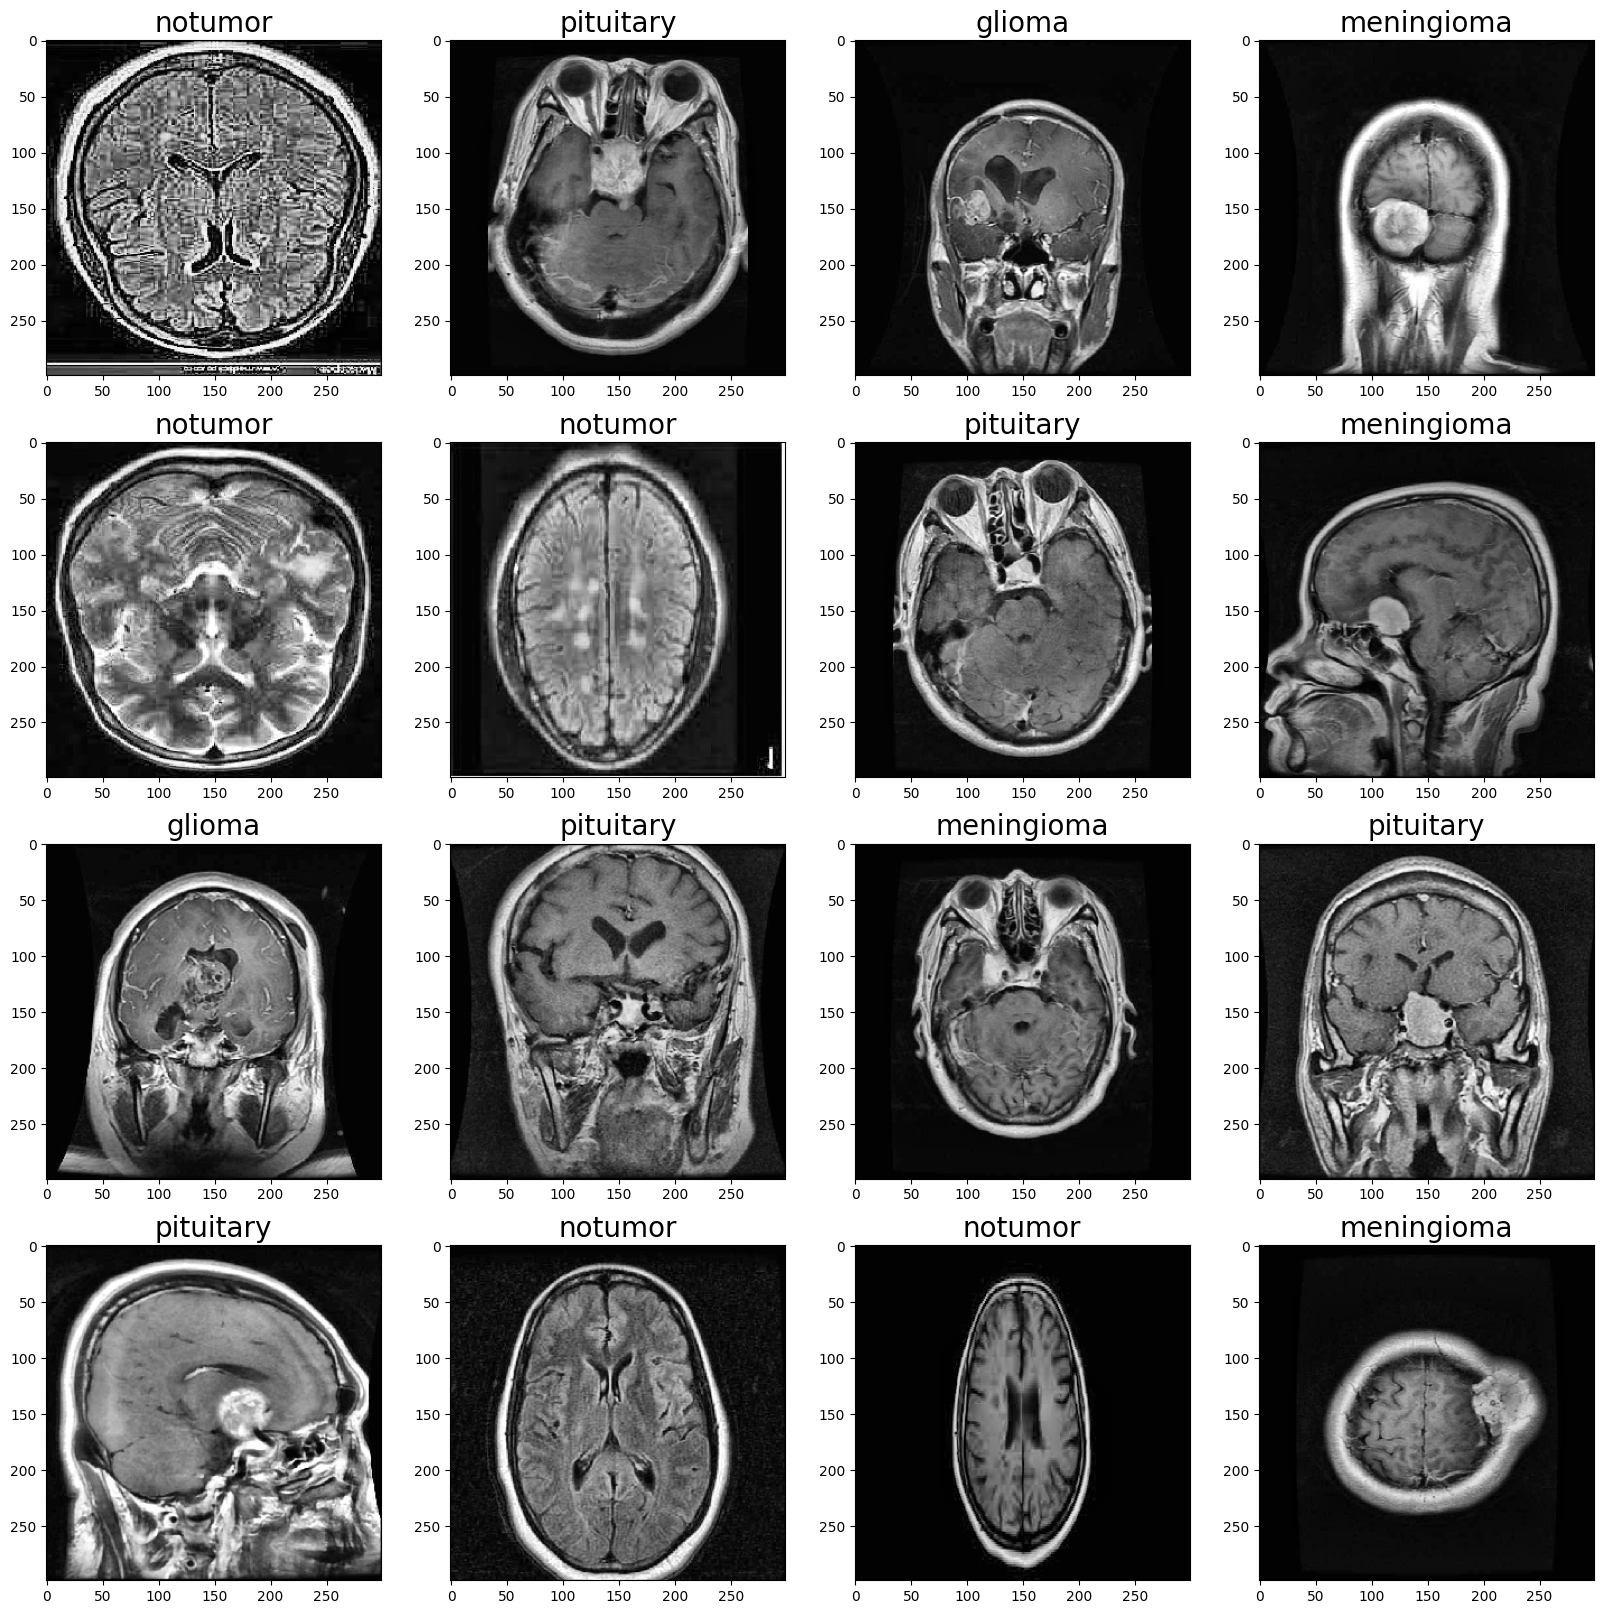

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)
plt.figure(figsize= (20, 20))
for i in range(16):
  plt.subplot(4,4,i+1)
  image = images[i] / 255
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name, color='k', fontsize=20)
plt.show()

## Creación del Modelo de Deep Learning

In [ ]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')


input_tensor = tf.keras.Input(shape=img_shape)
x = base_model(input_tensor)
x = Flatten()(x)
x = Dropout(rate= 0.3)(x)
x = Dense(128, activation= 'relu')(x)
x = Dropout(rate= 0.25)(x)
output_tensor = Dense(4, activation= 'softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

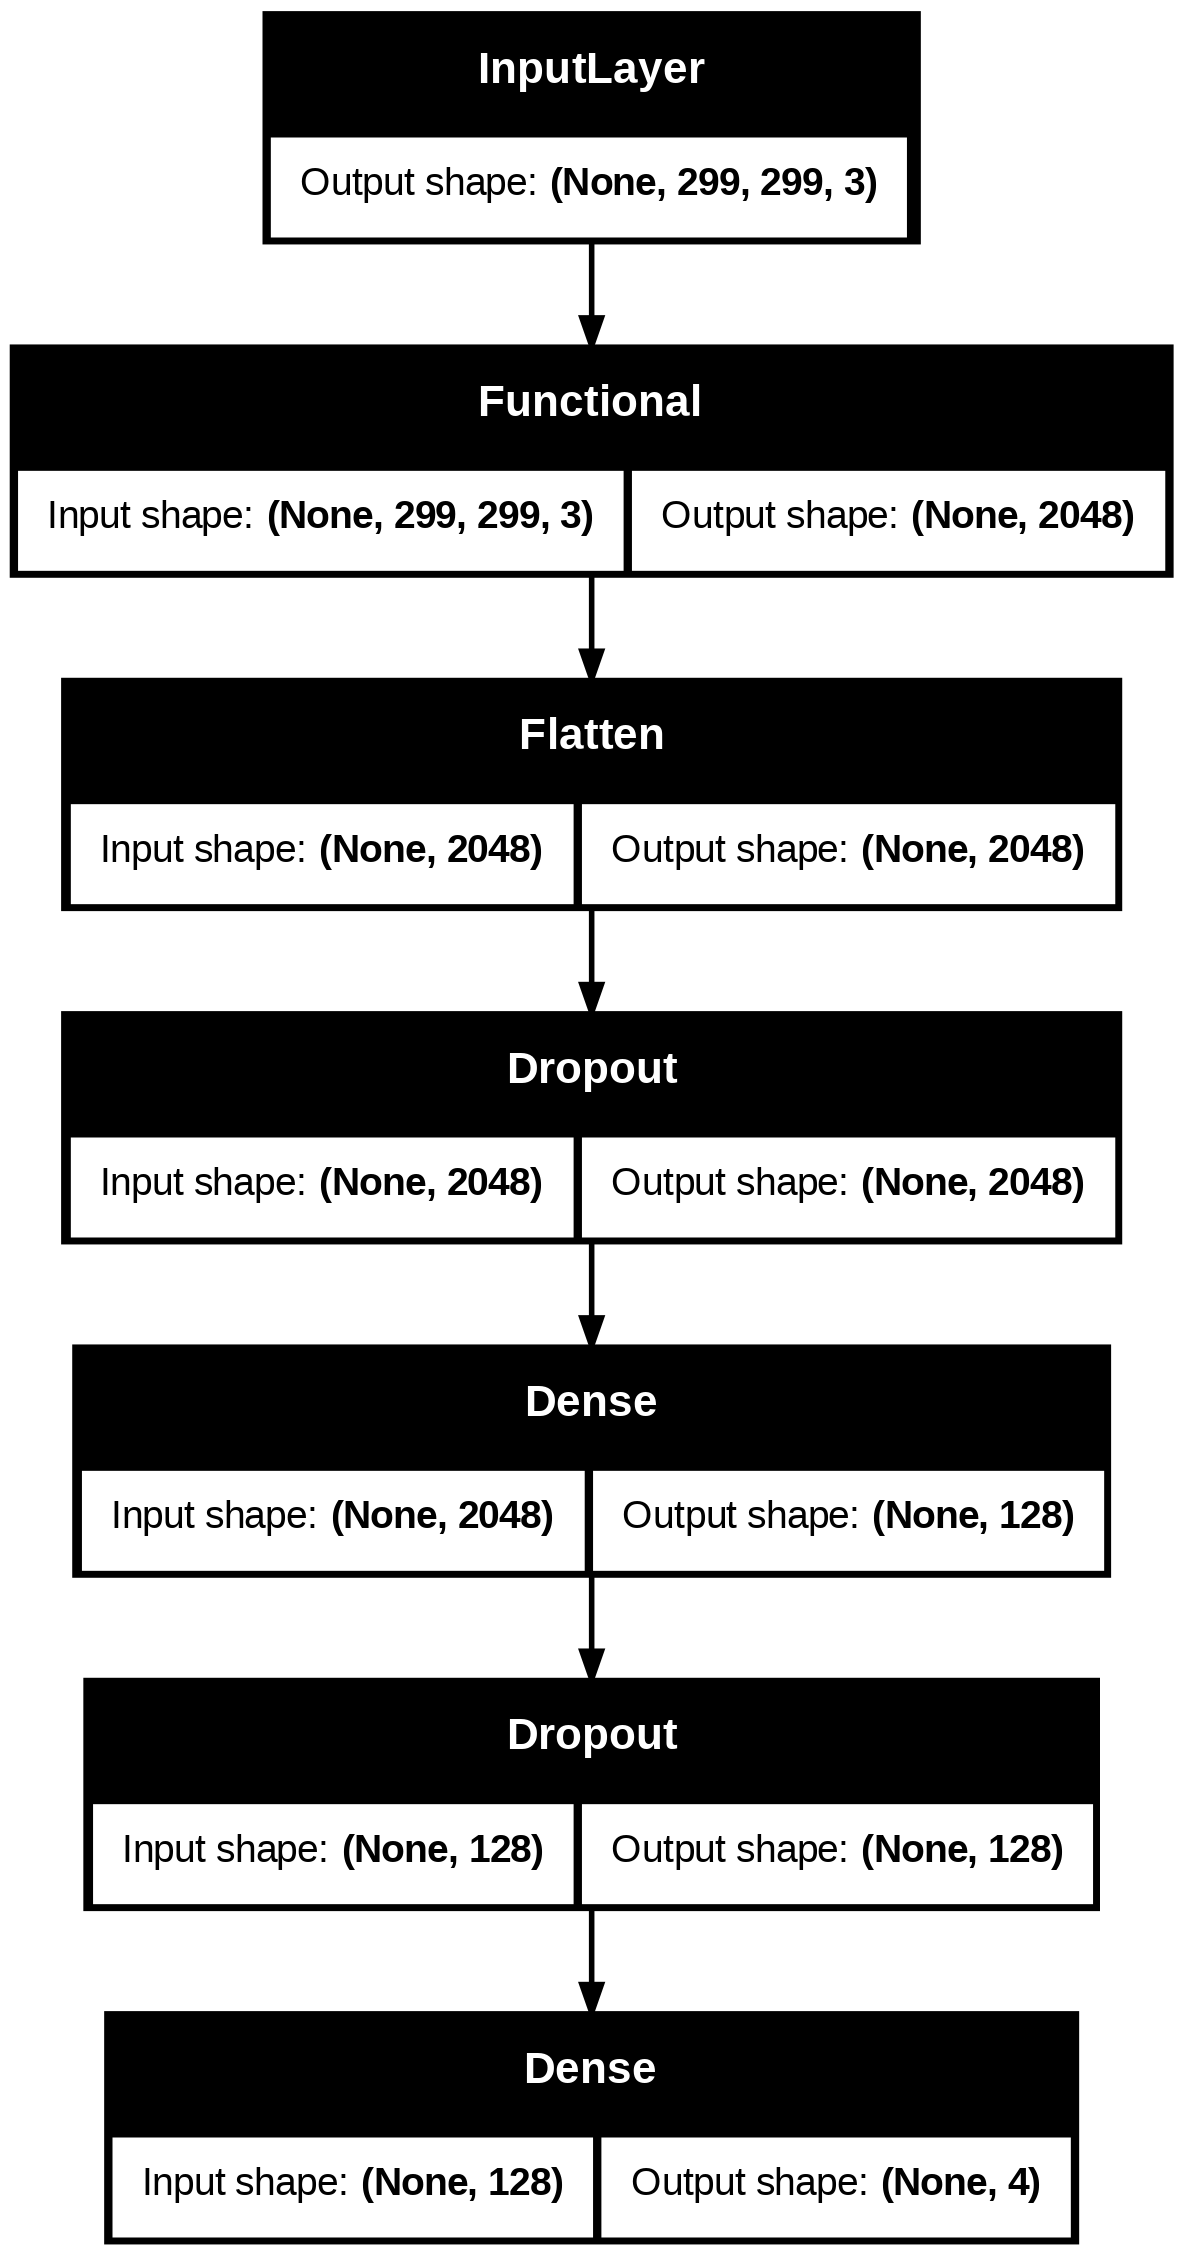

In [ ]:
import pydot
tf.keras.utils.plot_model(model, show_shapes=True)

## Entrenamiento

In [ ]:
hist = model.fit(tr_gen,
epochs=10,
validation_data=valid_gen,
shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1159s 3s/step - accuracy: 0.9307 - loss: 0.2118 - precision: 0.9421 - recall: 0.9198 - val_accuracy: 0.9573 - val_loss: 0.1076 - val_precision: 0.9646 - val_recall: 0.9557
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1032s 3s/step - accuracy: 0.9791 - loss: 0.0612 - precision: 0.9799 - recall: 0.9778 - val_accuracy: 0.9740 - val_loss: 0.0561 - val_precision: 0.9755 - val_recall: 0.9725
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1031s 3s/step - accuracy: 0.9924 - loss: 0.0243 - precision: 0.9928 - recall: 0.9920 - val_accuracy: 0.9832 - val_loss: 0.0623 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1037s 3s/step - accuracy: 0.9918 - loss: 0.0248 - precision: 0.9931 - recall: 0.9901 - val_accuracy: 0.9878 - val_loss: 0.0469 - val_precision: 0.9878 - val_recall: 0.9878
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1037s 3s/step - accuracy: 0.9934 - loss: 0.0205 - precision: 0.9937 - recall: 0.9930 - val_accuracy: 0.9817 - va

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

### Gráficas de Precisión y Pérdida

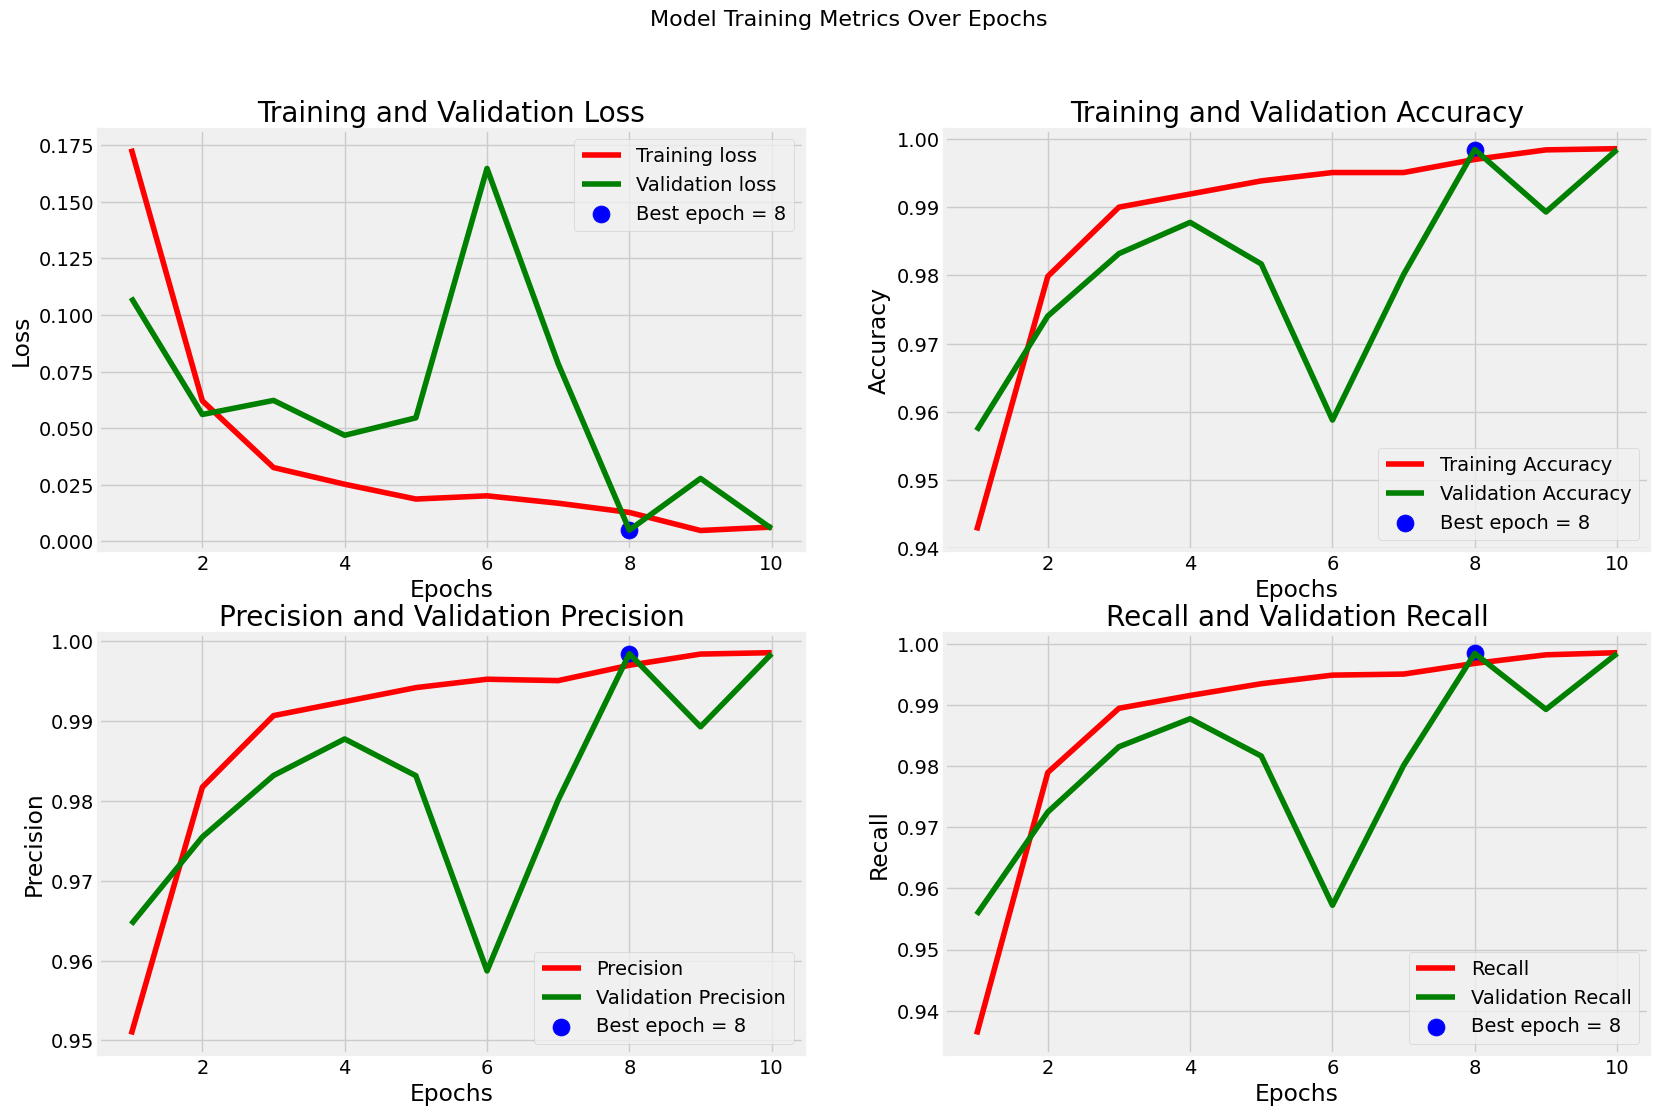

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

## Pruebas y Evaluación

### Evaluación

In [ ]:
train_score = model.evaluate(tr_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(ts_gen, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 174s 487ms/step - accuracy: 1.0000 - loss: 5.9332e-05 - precision: 1.0000 - recall: 1.0000
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 491ms/step - accuracy: 0.9989 - loss: 0.0051 - precision: 0.9989 - recall: 0.9989
41/41 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9943 - loss: 0.0247 - precision: 0.9943 - recall: 0.9943
Train Loss:  6.222508091013879e-05
Train Accuracy:  1.0
--------------------
Validation Loss:  0.005591906141489744
Validation Accuracy:  0.9984732866287231
--------------------
Test Loss:  0.024404490366578102
Test Accuracy:  0.9939024448394775


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 462ms/step


### Matriz de Confusión

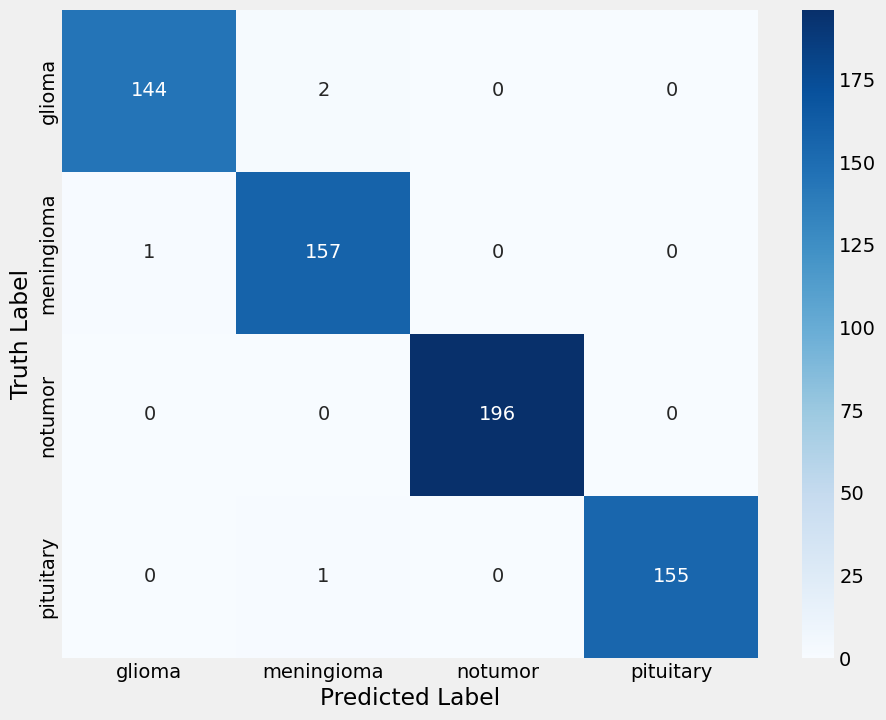

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

### Classification Report

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.98      0.99      0.99       158
           2       1.00      1.00      1.00       196
           3       1.00      0.99      1.00       156

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



### Prueba

In [ ]:
def predict(img_path):
  import numpy as np
  import matplotlib.pyplot as plt
  from PIL import Image
  label = list(class_dict.keys())
  plt.figure(figsize=(12, 12))
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img = np.asarray(resized_img)

  # Añadir la dimensión del canal de color

  img = np.expand_dims(img, axis=-1)

  # Se añade esta línea para copiar el canal de escala de grises a RGB

  img = np.repeat(img, 3, axis=-1)
  img = np.expand_dims(img, axis=0)
  predictions = model.predict(img)
  probs = list(predictions[0])
  labels = label
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probs)
  plt.xlabel('Probability', fontsize=15)
  ax = plt.gca()
  ax.bar_label(bars, fmt = '%.2f')
  plt.show()

### Ejemplos de Predicción

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step


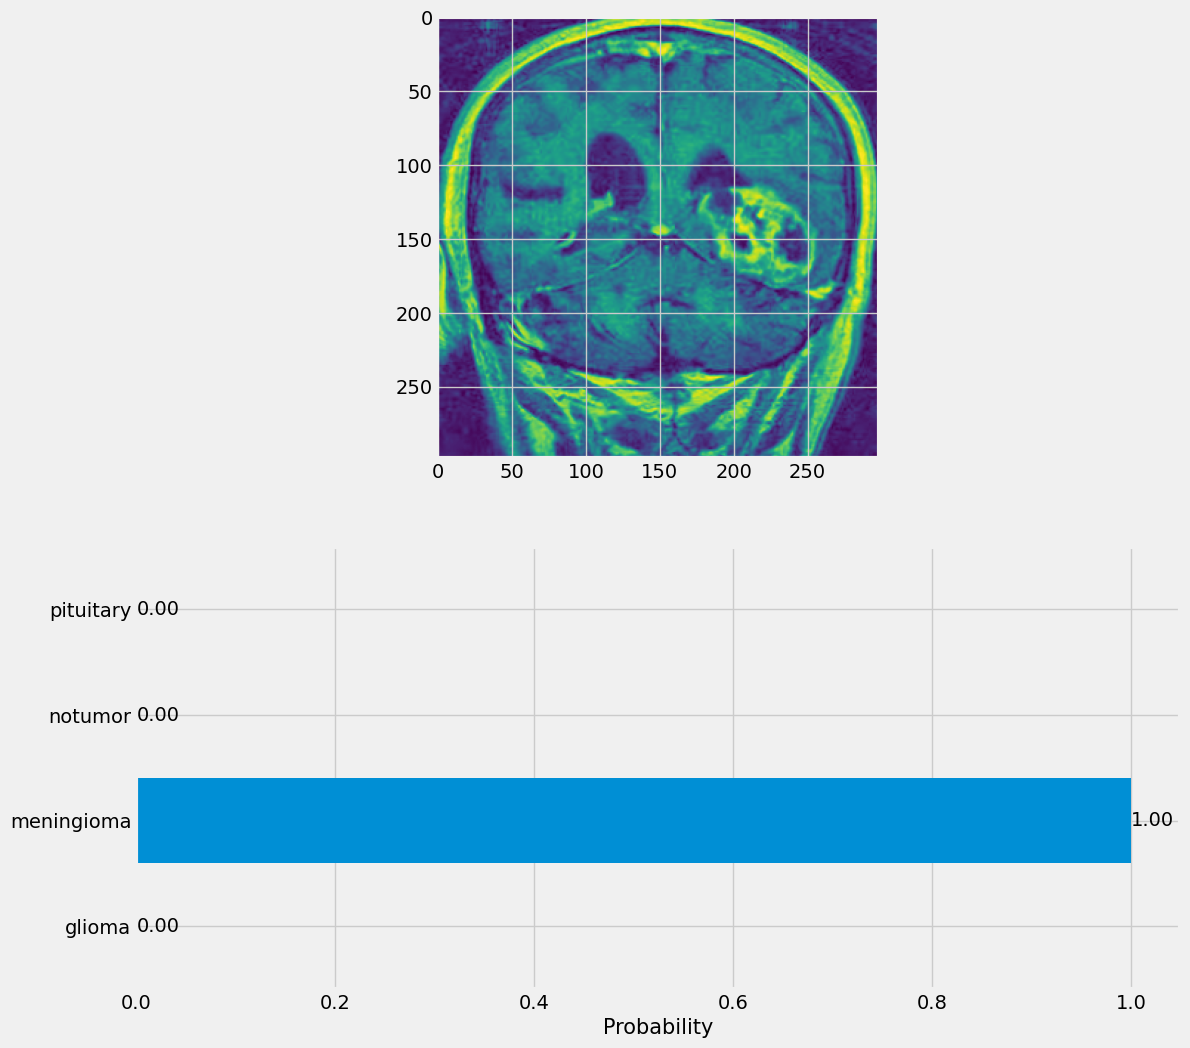

In [ ]:
predict("/content/drive/MyDrive/Tumor_Brain_CLAHE/Testing/meningioma/Te-meTr_0007.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


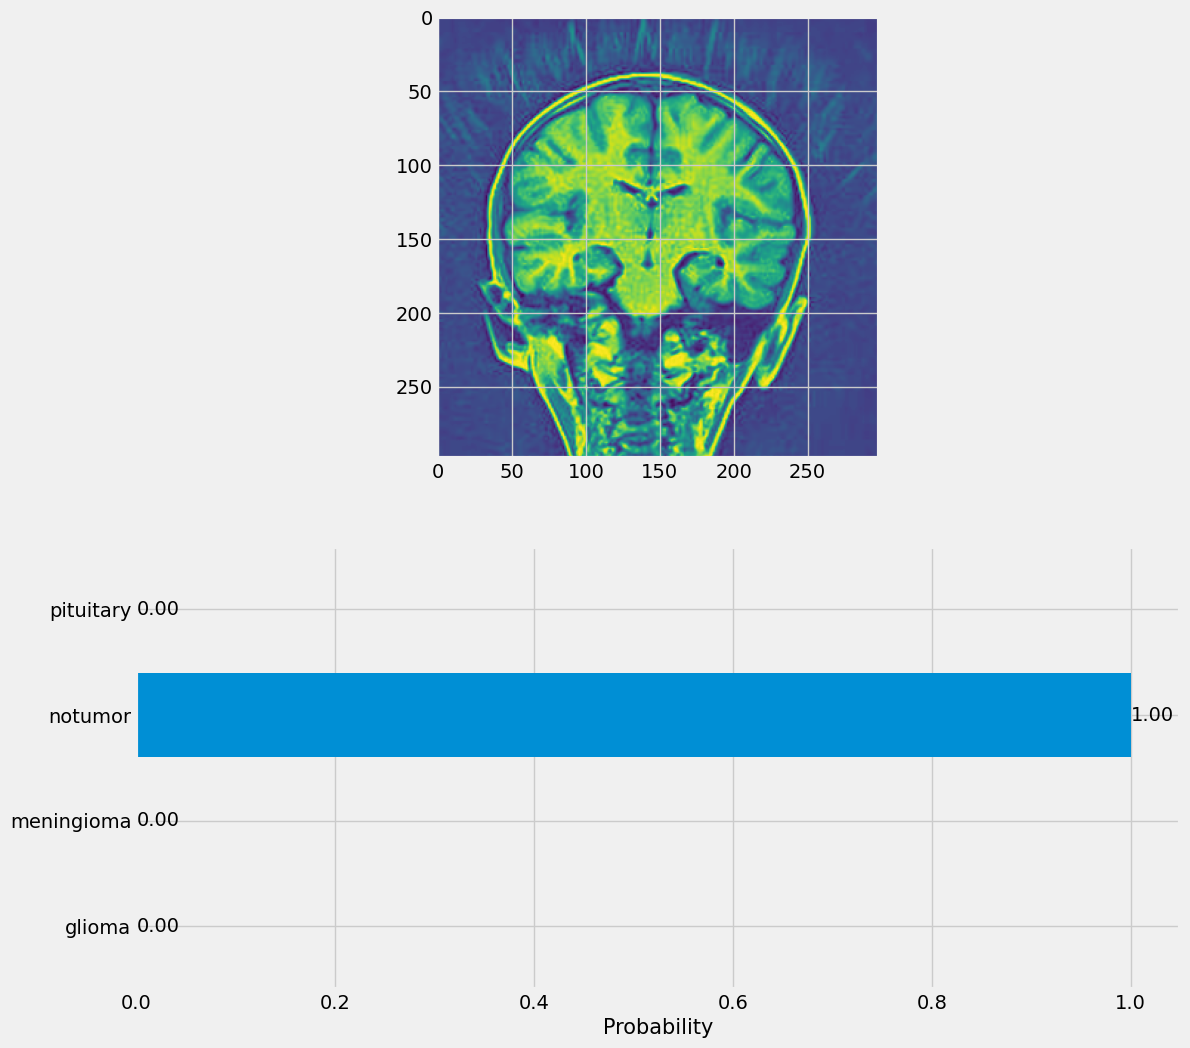

In [ ]:
predict("/content/drive/MyDrive/Tumor_Brain_CLAHE/Testing/notumor/Te-no_0025.jpg")